bin_true = Binomial(n, p) = Binomial{Float64}(n=20, p=0.3)


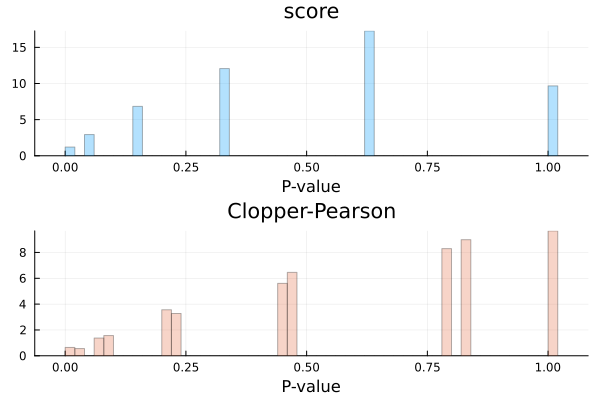

In [1]:
using Distributions
using StatsPlots
default(fmt=:png)
safediv(x, y) = x ==0 ? zero(x/y) : x/y

ecdf_naive(A, x) = count(≤(x), A) / length(A)

function pvalue_bin_score(k, n, p)
    z = safediv(k - n*p, √(n*p*(1-p)))
    2ccdf(Normal(), abs(z))
end

function pvalue_bin_clopper_pearson(k, n, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k-1))
end

n, p = 20, 0.3
@show bin_true = Binomial(n, p)
L = 10^5
K = rand(bin_true, L)
pval_score = pvalue_bin_score.(K, n, p)
pval_cp = pvalue_bin_clopper_pearson.(K, n, p)

P = histogram(pval_score; norm=true, alpha=0.3, label="", title="score")
plot!(xguide="P-value", label="density")
Q = histogram(pval_cp; norm=true, alpha=0.3, label="", title="Clopper-Pearson", c=2)
plot!(xguide="P-value", label="density")
plot(P, Q; layout=(2, 1))

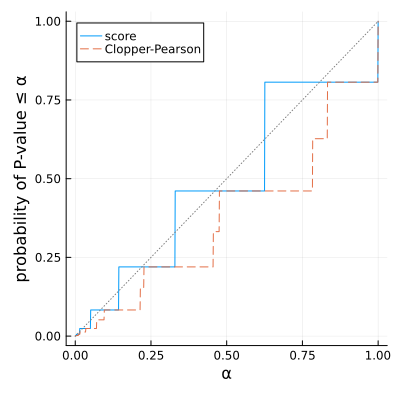

In [2]:
αs = 0:0.001:1
plot(αs, α -> ecdf_naive(pval_score, α); label="score")
plot!(αs, α -> ecdf_naive(pval_cp, α); label="Clopper-Pearson", ls=:dash)
plot!(identity, 0, 1; label="", ls=:dot, c=:gray)
plot!(xguide="α", yguide="probability of P-value ≤ α")
plot!(size=(400, 400))

(μ, σ) = (mean(mixnormal), std(mixnormal)) = (1.0, 4.47213595499958)


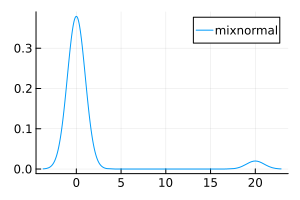

bin = floor(minimum(X̄)):0.5:ceil(maximum(X̄)) = -1.0:0.5:6.0


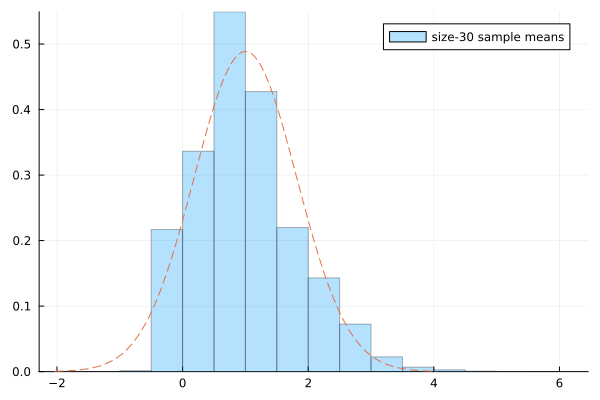

In [3]:
mixnormal = MixtureModel([Normal(), Normal(20)], [0.95, 0.05])
@show μ, σ = mean(mixnormal), std(mixnormal)
plot(1mixnormal; label="mixnormal", size=(300, 200)) |> display

n = 30
L = 10^5
X̄ = [mean(rand(mixnormal, n)) for _ in 1:L]
@show bin = floor(minimum(X̄)):0.5:ceil(maximum(X̄))
histogram(X̄; norm=true, alpha=0.3, label="size-$n sample means", bin)
plot!(Normal(μ, σ/√n); label="", ls=:dash)

bin = floor(minimum(X̄)):0.1:ceil(maximum(X̄)) = -1.0:0.1:6.0


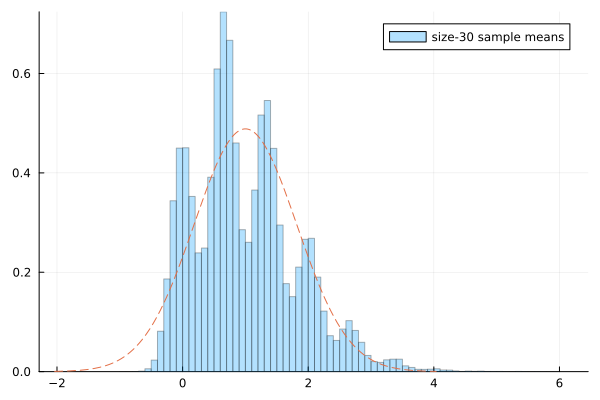

In [4]:
@show bin = floor(minimum(X̄)):0.1:ceil(maximum(X̄))
histogram(X̄; norm=true, alpha=0.3, label="size-$n sample means", bin)
plot!(Normal(μ, σ/√n); label="", ls=:dash)

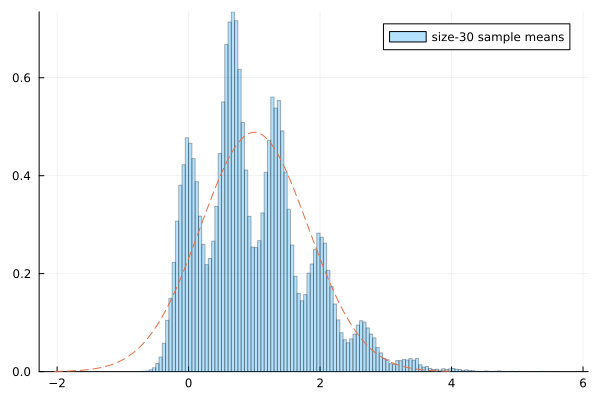

In [5]:
histogram(X̄; norm=true, alpha=0.3, label="size-$n sample means")
plot!(Normal(μ, σ/√n); label="", ls=:dash)

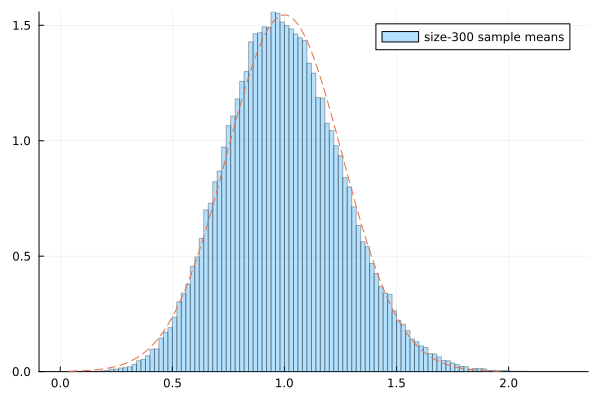

In [6]:
n = 300
L = 10^5
X̄ = [mean(rand(mixnormal, n)) for _ in 1:L]
histogram(X̄; norm=true, alpha=0.3, label="size-$n sample means")
plot!(Normal(μ, σ/√n); label="", ls=:dash)

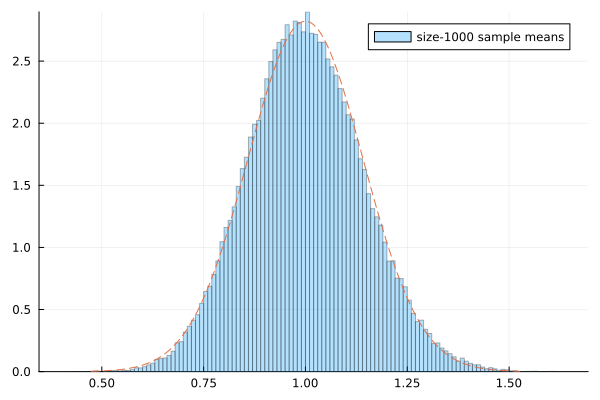

In [7]:
n = 1000
L = 10^5
X̄ = [mean(rand(mixnormal, n)) for _ in 1:L]
histogram(X̄; norm=true, alpha=0.3, label="size-$n sample means")
plot!(Normal(μ, σ/√n); label="", ls=:dash)